In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import korean_language

### 특성공학 - 독립변수 최적화 기법
### 차원축소 : 종속변수와 상관관계가 높은 가장 영향력 있는 독립변수를 선택(예 : 주요 과목)
#### - 차원 축소가 필요한 이유 : 연산량, 메모리 사용량 줄임, 샘플의 특징을 보기 좋게 시각화하기 위함
#### - 종속변수와 상관관계가 높은 독립변수를 선택 : selectpercentile()로 상관성이 높은 독립변수 확인이 가능

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [6]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

In [8]:
std = StandardScaler()
std_x = std.fit_transform(x)

In [9]:
std_x.shape

(569, 30)

In [10]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [11]:
rtree = RandomForestClassifier(n_estimators=200)

In [12]:
cross_val_score(rtree, std_x, y, cv=5)

array([0.92982456, 0.94736842, 0.97368421, 0.96491228, 0.96460177])

In [14]:
score = cross_val_score(rtree, std_x, y, cv=5)
score.mean().round(4)

0.9596

#### 가장 영향력 있는 상위 20%(6개)독립변수 추출

In [18]:
fs = SelectPercentile(chi2, percentile=20)

In [20]:
x_p = fs.fit_transform(x,y)

In [23]:
x_p = std.fit_transform(x_p)

In [26]:
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

In [27]:
fs.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False])

In [25]:
cross_val_score(rtree, x_p, y).mean().round(5)

0.92801

#### 가장 영향력 있는 상위 6%(2개)독립변수 추출 

In [28]:
fs = SelectPercentile(chi2, percentile=6)

In [29]:
x_p = fs.fit_transform(x,y)
x_p = std.fit_transform(x_p)

In [30]:
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

In [31]:
cross_val_score(rtree, x_p, y).mean().round(5)

0.91916

In [37]:
x.shape, x_p.shape

((569, 30), (569, 2))

### 주성분분석(PCA) : 여러 독립변수를 조합하여 이들을 대표할 수 있는 주성분(새로운 독립변수)을 찾는 작업
#### 종속변수를 예측하기 위해 독립변수에 가중치를 곱해 선형조합을 함
#### 주성분은 독립변수들을 어떤 비율로 가중 합산해야 할지는 컨퓨터가 자동으로 여러 조합을 만들어 보고 최적의 조합을 찾음
#### 참고사이트 : https://excelsior-cjh.tistory.com/167
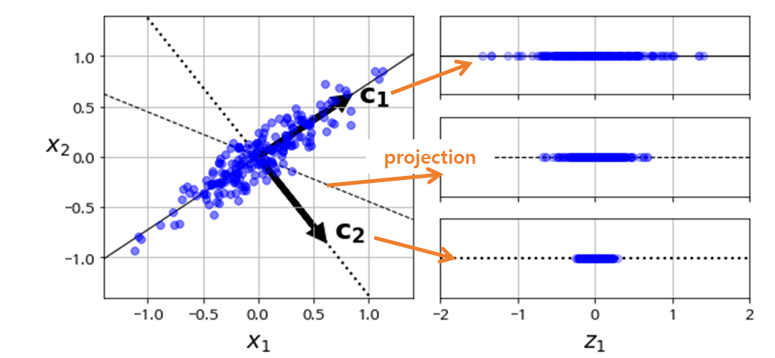
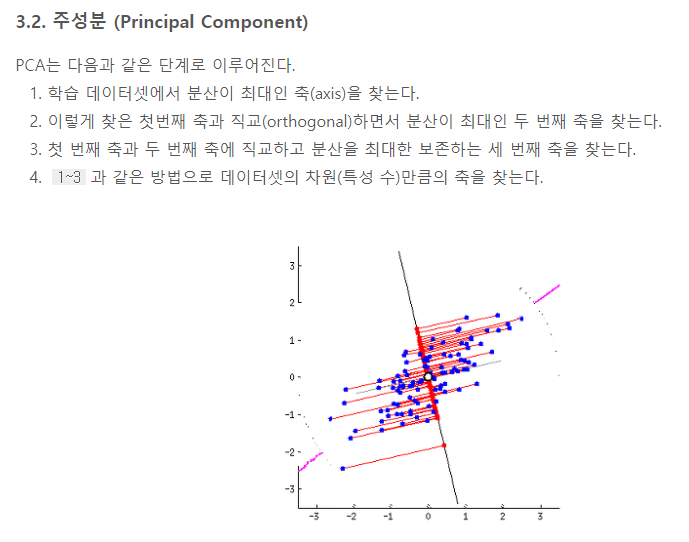

In [38]:
pca = PCA(n_components=2)

In [39]:
pca.fit_transform(x)

array([[1160.1425737 , -293.91754364],
       [1269.12244319,   15.63018184],
       [ 995.79388896,   39.15674324],
       ...,
       [ 314.50175618,   47.55352518],
       [1124.85811531,   34.12922497],
       [-771.52762188,  -88.64310636]])

In [52]:
pca_result = pca.fit_transform(x)

In [44]:
m = ['v','o']
c = ['r','b']

C:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


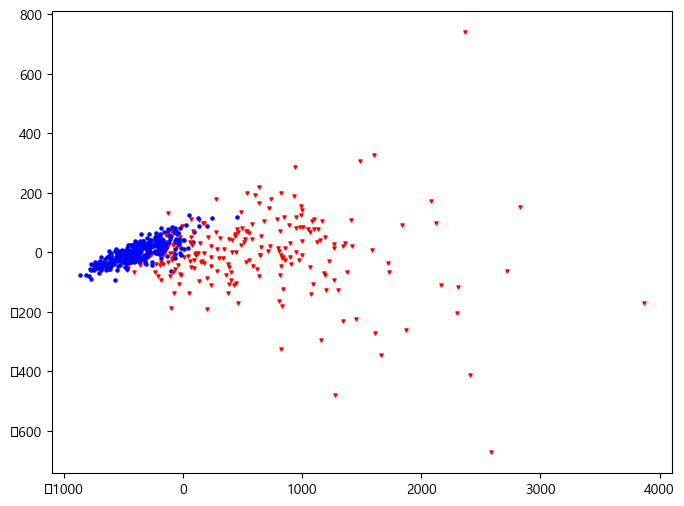

In [53]:
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i], pca_result[:,1][i], marker=m[y[i]], color=c[y[i]], s=5)
    
plt.show()    

### 각 독립변수별 가중치 값 확인
#### - 첫번째 주성분변수의 독립변수 30개의 가중치와 두번 주성분변수의 독립변수 30개의 가중치

In [54]:
pca.components_.round(3)

array([[ 0.005,  0.002,  0.035,  0.517,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -0.   ,  0.   , -0.   ,  0.002,  0.056, -0.   ,  0.   ,
         0.   ,  0.   , -0.   , -0.   ,  0.007,  0.003,  0.049,  0.852,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.009, -0.003,  0.063,  0.852, -0.   , -0.   ,  0.   ,  0.   ,
        -0.   , -0.   , -0.   ,  0.   ,  0.001,  0.008,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   , -0.001, -0.013, -0.   , -0.52 ,
        -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ]])

### 원시데이터의 2개 주성분의 데이터 설명력 확인 explained_variance_ratio_

In [55]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.98204467, 0.01617649]), 0.9982211613741724)

### 정규화데이터로 2개 주성분의 데이터 설명력 확인 explained_variance_ratio_

In [56]:
pca.fit_transform(std_x)

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

C:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


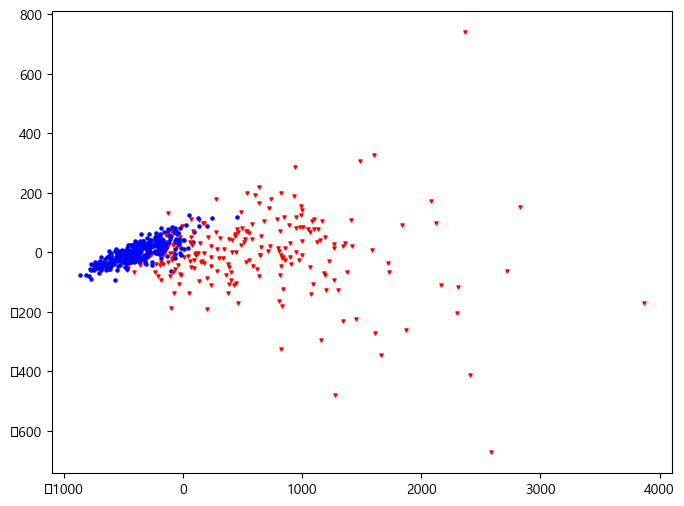

In [57]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i], pca_result[:,1][i], marker=m[y[i]], color=c[y[i]], s=5)
    
plt.show() 

In [58]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182]), 0.6324320765155942)

In [60]:
cross_val_score(rtree, pca_result, y ,cv=5).mean().round(4)

0.9262

In [62]:
pca = PCA(n_components=6)

In [63]:
pca_result = pca.fit_transform(x)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
        8.82724536e-05, 6.64883951e-06]),
 0.999994525375825)

In [64]:
cross_val_score(rtree, pca_result, y ,cv=5).mean().round(4)

0.949

In [65]:
pca_result = pca.fit_transform(std_x)
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
        0.04024522]),
 0.8875879635665317)

In [66]:
cross_val_score(rtree, pca_result, y ,cv=5).mean().round(4)

0.9473

### 매니폴드 학습
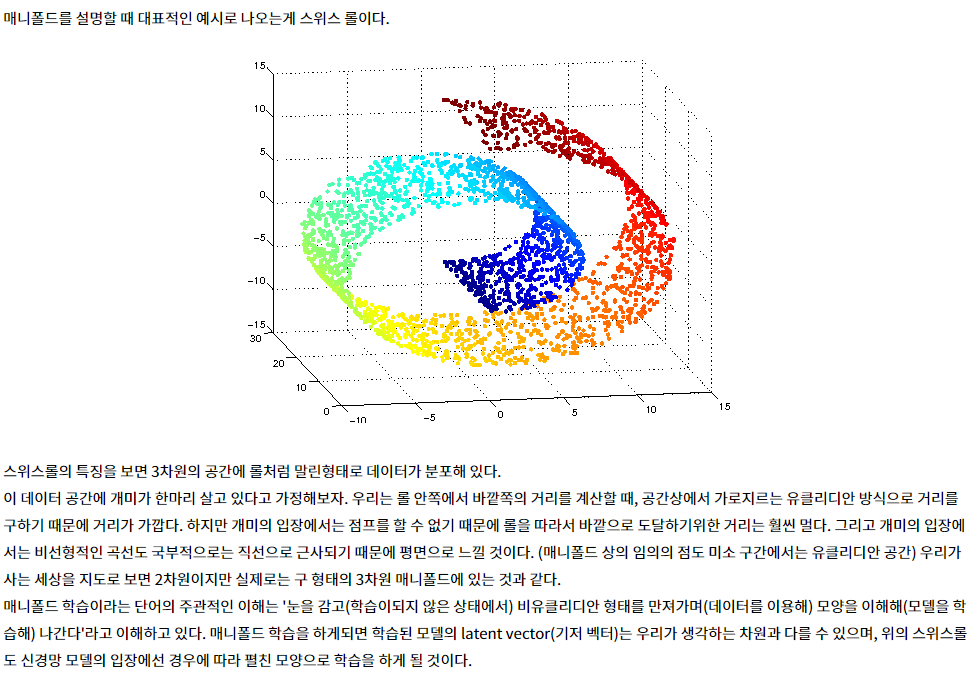

In [74]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000,random_state=123)

In [75]:
tsne_result = tsne.fit_transform(cancer.data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.076s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 38.912067
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.020481
[t-SNE] KL divergence after 1000 iterations: 0.206900


C:\python\ml308\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


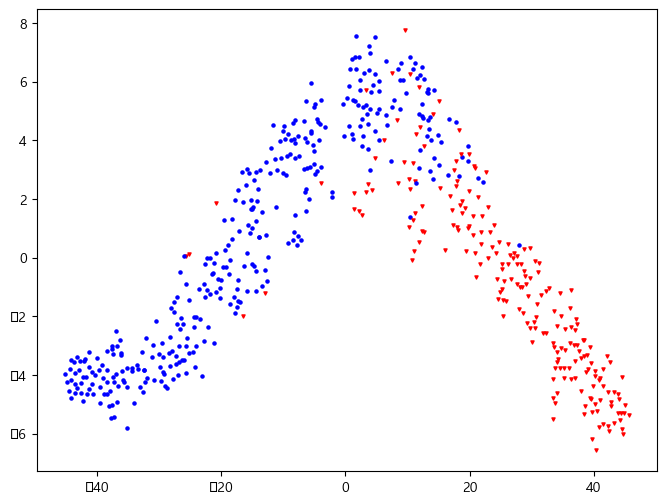

In [76]:
m = ['v','o']
c = ['r','b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(tsne_result[:,0][i], tsne_result[:,1][i], marker=m[y[i]], color=c[y[i]], s=5)
    
plt.show() 

## 모델 일반화 : 학습성능과 테스트성능이 유사하게 나오도록 하는 것 
## 규제는 독립변수 영향력이 큰 것을 작게할때 ridge를 영향력이 작은것을 더 작게할때 lasso를 적용하여 가중치값에 알파값을 적용하여 규제함
#### 교차검증, 정규화, 또는 손실함수에 규제(알파값)을 적용
#### MSE손실함수에 규제를 추가(ridge -L2, lasso - L1), 즉 특정 독립변수의 가중치의 값이 작도록 하는것으로 알파값을 주어서 가중치비중을 낮춘다
#### 최종적으로 여러 독립변수의 가중치를 골고루하여 성능을 일반화시킴
#### ridge는 독립변수 가중치을 제곱하고 lasso는 독립변수 가중치를 절대값하여 알파값을 적용하며 ridge의 반대효과를 냄
## lasso는 독립변수의 가중치가 작은것이 영향력이 더 작아지고 ridge는 가중치가 큰것이 영향력을 작게하는 효과가 있음
#### elasticnet은 lasso와 ridge를 동시에 적용하는 규제방법

### 오차는 분산(variance) 편향(bias) 두가지 성분으로 설명됨
#### 분산 : 모델이 너무 복잡하거나 학습 데이터에 민감하게 반응하여 예측값이 산발적으로 나타남
#### 편향 : 모델자체가 부정확하여 피할수 없이 발생하는 오차